In [25]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm

In [26]:
def TV_cont(f,g,ax):
    dx = 0.01
    grid = np.arange(-4,4,dx)
    TV =  sum([abs(f.pdf(x)-g.pdf(x))*dx for x in grid])
    
    ax.plot(grid,f.pdf(grid))
    ax.plot(grid,g.pdf(grid))
    ax.fill_between(grid,f.pdf(grid),g.pdf(grid),where=f.pdf(grid)>g.pdf(grid),alpha=0.6)
    ax.title.set_text(f'TV = {0.5*TV:.2f}')
    
    return ax

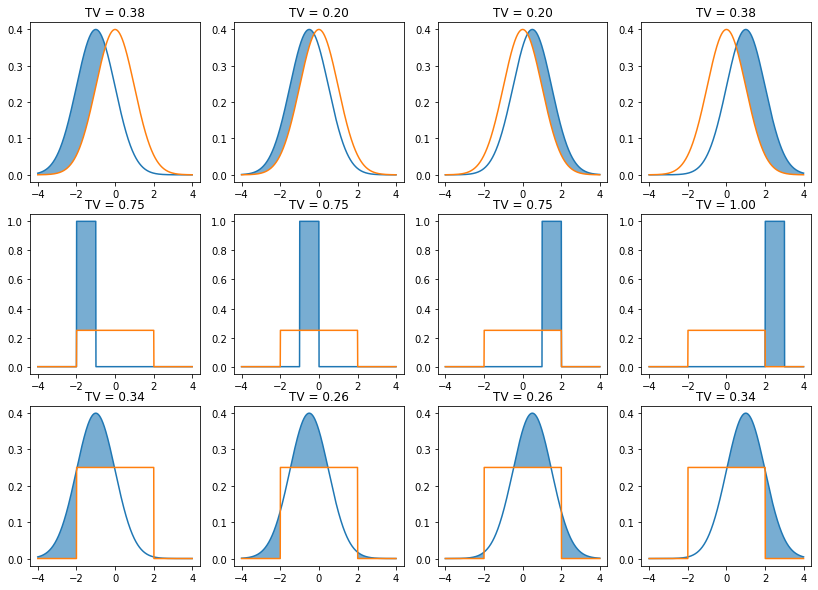

In [27]:
f_norm = norm()
f_unif = uniform(-2,4)
μ_values = [-1,-.5,.5,1,]
loc_values = [-2,-1,1,2]
fig, axes = plt.subplots(3,4,figsize=(14,10))
axes = axes.flatten()
for ax,μ in zip(axes[:4],μ_values):
    ax = TV_cont(norm(μ),f_norm,ax)
    
for ax,loc in zip(axes[4:8],loc_values):
    ax = TV_cont(uniform(loc),f_unif,ax)
for ax,μ in zip(axes[8:],μ_values):
    ax = TV_cont(norm(μ),f_unif,ax)
fig.savefig('total_variation.pdf')

vil lage plot med TV og KL som funksjon av parameter.

In [32]:
def KL(f,g):
    dx = 0.01
    grid = np.arange(-5,5,dx)
    KL =  sum([f.pdf(x)*np.log(f.pdf(x)/g.pdf(x))*dx for x in grid])
    return KL
def TV(f,g):
    dx = 0.01
    grid = np.arange(-5,5,dx)
    TV =  sum([abs(f.pdf(x)-g.pdf(x))*dx for x in grid])
    return 0.5*TV
def MLE(μ,x):
    MLE = -sum([np.log(norm(μ).pdf(_)) for _ in x])/N
    return MLE
    

In [43]:
dμ = .5
N = 300

TV_list, KL_list, MLE_list = [],[],[]
μ_values = np.arange(-3,3+dμ,dμ)
g = norm()
x = g.rvs(N)
for μ in μ_values:
    f = norm(μ)
    TV_list.append(TV(f,g))
    KL_list.append(KL(f,g))
    MLE_list.append(MLE(μ,x))

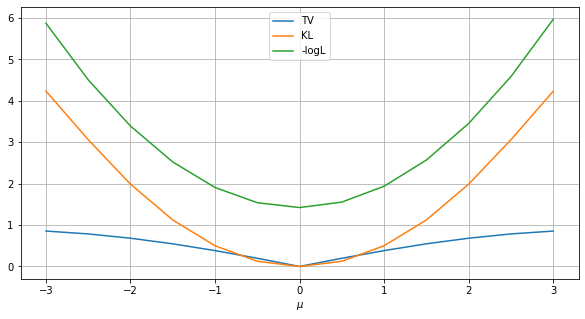

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(μ_values,TV_list,label='TV')
ax.plot(μ_values,KL_list,label='KL')
ax.plot(μ_values,MLE_list,label='-logL')
ax.set_xlabel(r'$\mu$')
ax.grid()
ax.legend()
fig.savefig('TV_KL_LogL.pdf')